In [1]:
import pandas as pd

In [22]:
df = pd.read_csv('Fraud.csv')

In [3]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [53]:
fraud_data = df[df['isFraud']==1]
fraud_data.head(25)

fraud_data.head(25)

print(len(fraud_data))
print(fraud_data['type'].value_counts())

print("Length of the Fraud values data : " + str(len(fraud_data)))

f1 = fraud_data.loc[fraud_data['newbalanceOrig']==0]
print("No of 0's in fraud data's newbalanceOrig : " + str(len(f1)))

f2 = fraud_data.loc[fraud_data['oldbalanceDest']==0]
print("No of 0's in fraud data's oldbalanceDest : " + str(len(f2)))

8213
CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64
Length of the Fraud values data : 8213
No of 0's in fraud data's newbalanceOrig : 8053
No of 0's in fraud data's oldbalanceDest : 5351


In [35]:
print(len(df))
print(df['type'].value_counts())

6362620
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
print(df['isFraud'].unique())

[0 1]


In [7]:
print(df['isFlaggedFraud'].unique())

[0 1]


In [8]:
print(df['isFraud'].value_counts())

0    6354407
1       8213
Name: isFraud, dtype: int64


In [9]:
print(df['isFlaggedFraud'].value_counts())

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64


In [10]:
print(df.shape)

(6362620, 11)


In [4]:
df = df[(df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']] != 0).any(axis=1)]

In [5]:
print(df.shape)

(6362614, 11)


In [6]:
df = df[(df[['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']] != 0).any(axis=1)]

In [7]:
print(df.shape)

(5588345, 11)


In [15]:
df.dropna(inplace=True)
print(df.shape)

(5588345, 11)


In [16]:
df.drop_duplicates(inplace=True)
print(df.shape)

(5588345, 11)


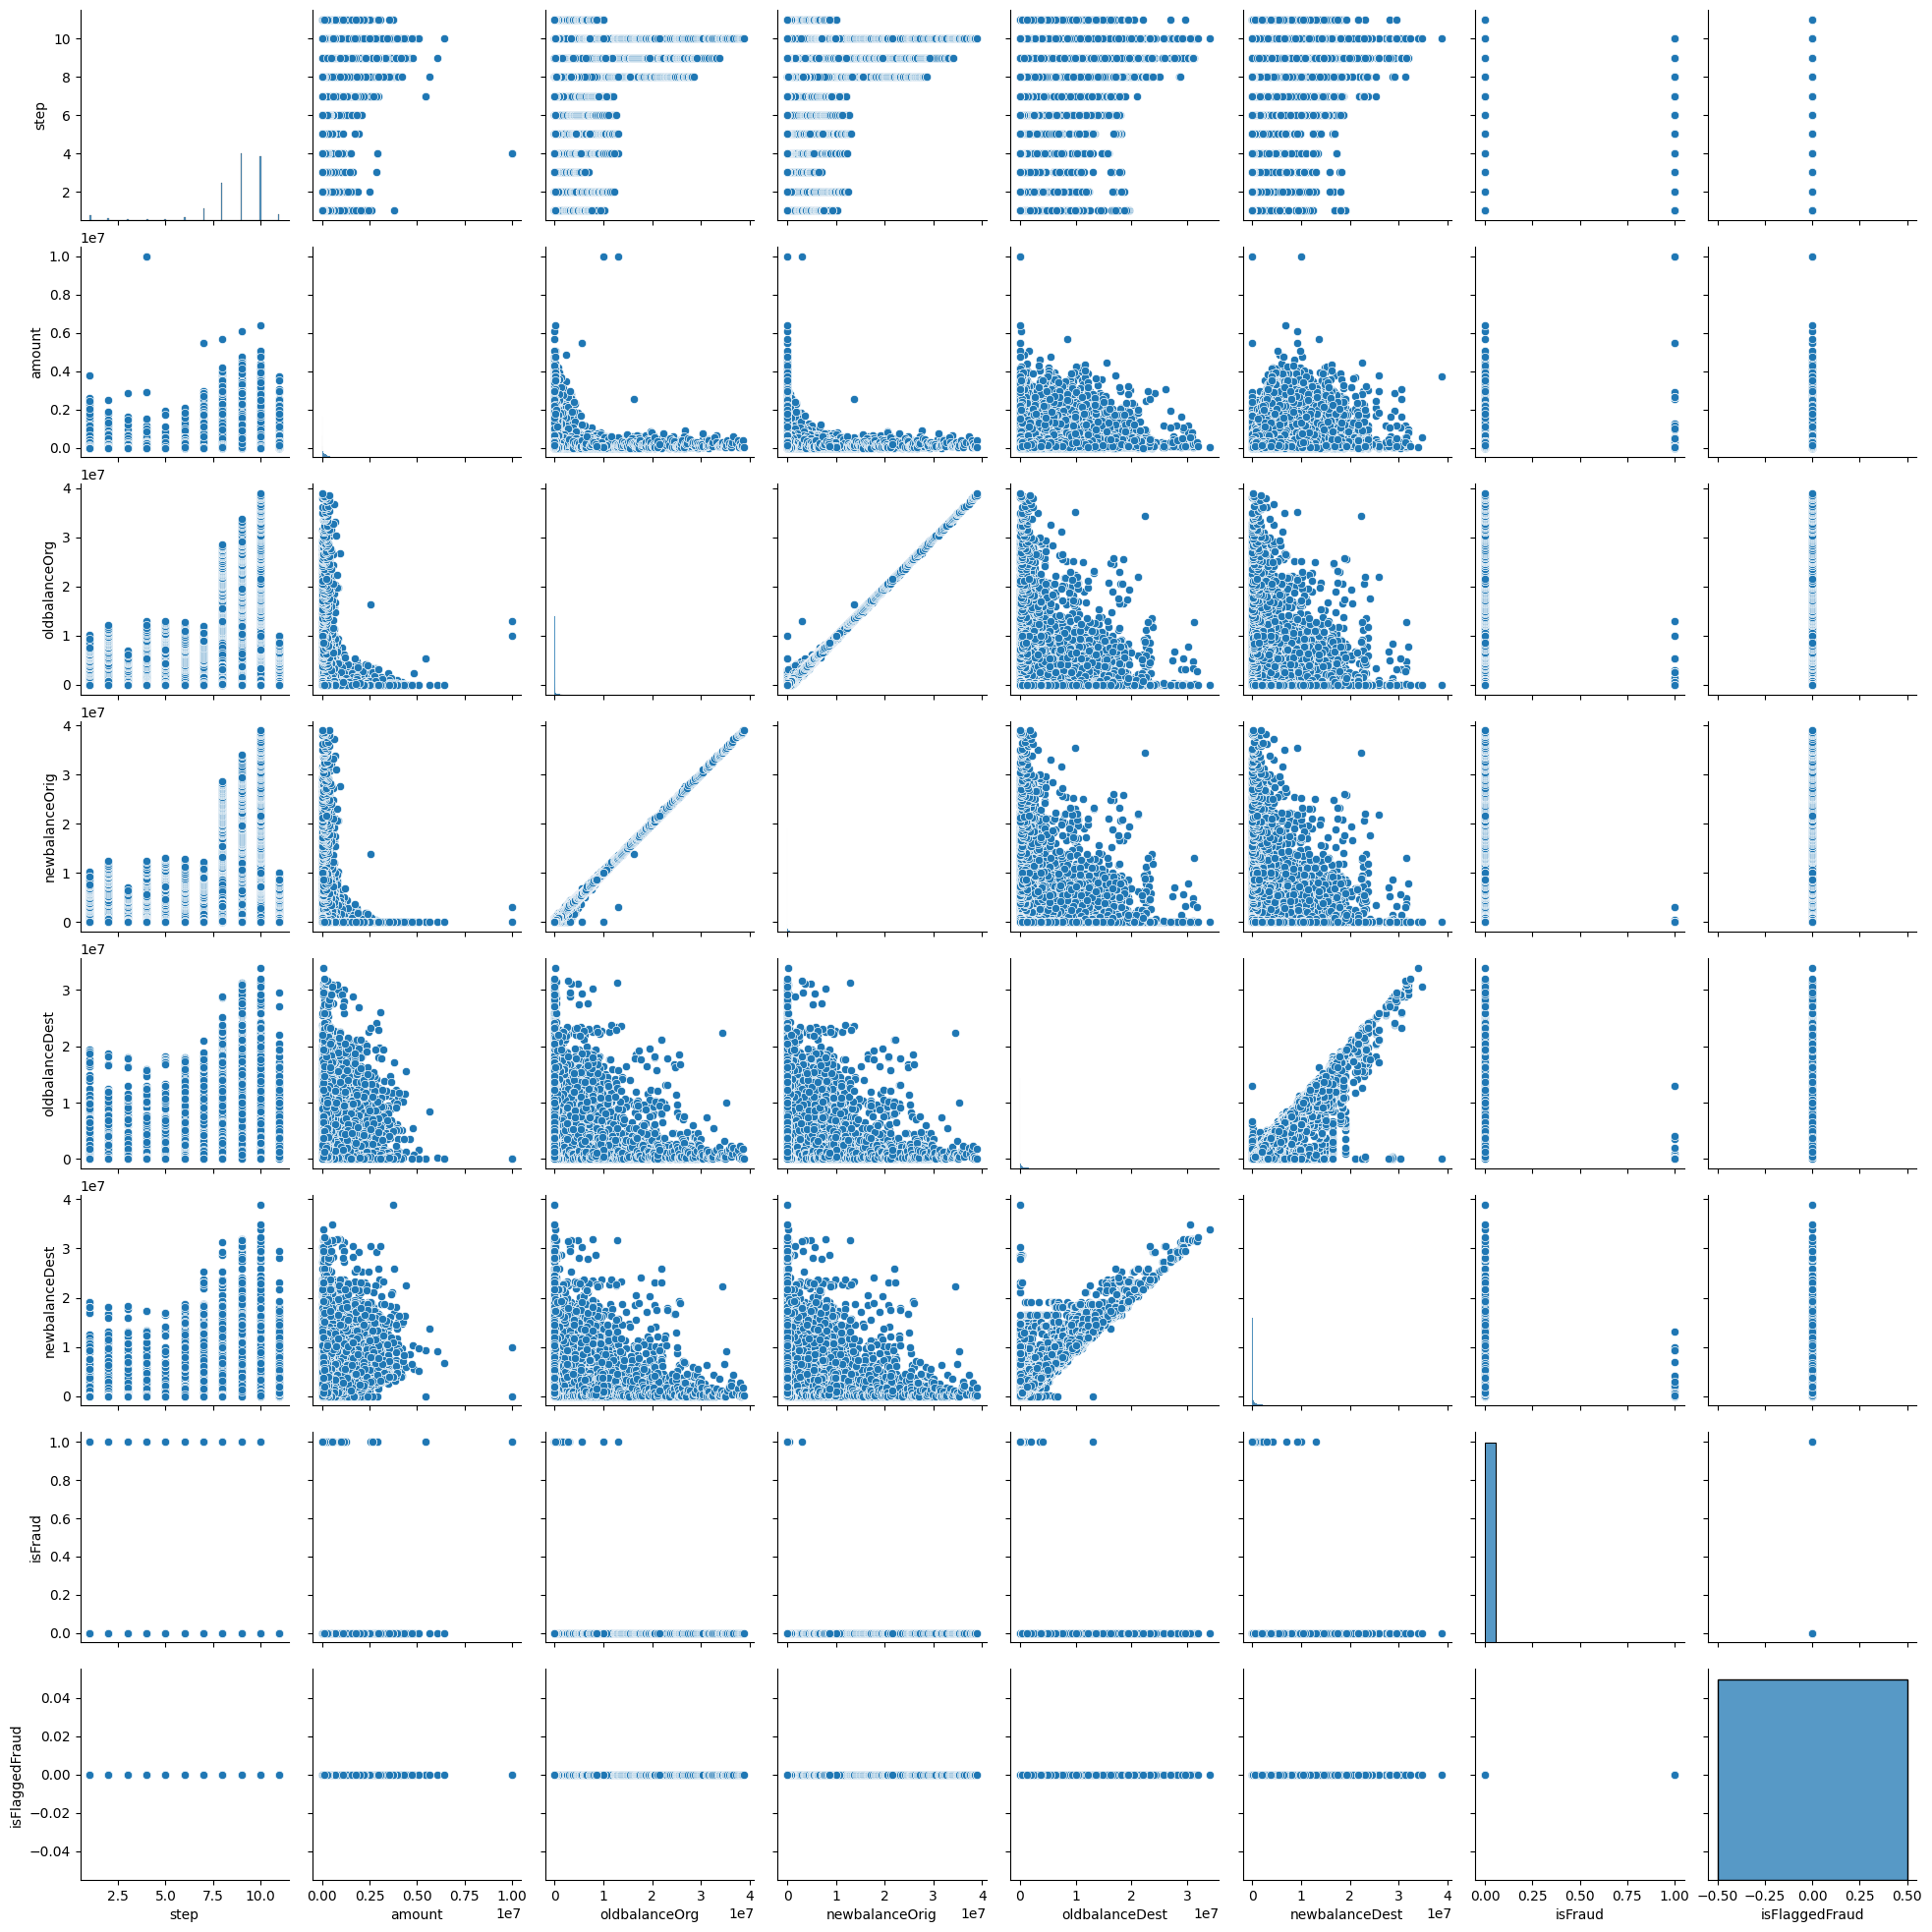

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

df1 = df[['type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud']]
df1 = df[:100000]
sns.pairplot(df1)
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler

numerical_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [9]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,-0.301294,C1231006815,-0.254336,-0.262226,M1979787155,-0.348056,-0.358532,0,0
1,1,PAYMENT,-0.313738,C1666544295,-0.302928,-0.307659,M2044282225,-0.348056,-0.358532,0,0
2,1,TRANSFER,-0.316365,C1305486145,-0.309804,-0.313909,C553264065,-0.348056,-0.358532,1,0
3,1,CASH_OUT,-0.316365,C840083671,-0.309804,-0.313909,C38997010,-0.342174,-0.358532,1,0
4,1,PAYMENT,-0.298441,C2048537720,-0.296301,-0.304273,M1230701703,-0.348056,-0.358532,0,0


In [10]:
X = df.drop(['step','nameOrig','nameDest','isFraud'],axis=1)
y = df.iloc[:,-2:-1]

In [11]:
X.head(5)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,PAYMENT,-0.301294,-0.254336,-0.262226,-0.348056,-0.358532,0
1,PAYMENT,-0.313738,-0.302928,-0.307659,-0.348056,-0.358532,0
2,TRANSFER,-0.316365,-0.309804,-0.313909,-0.348056,-0.358532,0
3,CASH_OUT,-0.316365,-0.309804,-0.313909,-0.342174,-0.358532,0
4,PAYMENT,-0.298441,-0.296301,-0.304273,-0.348056,-0.358532,0


In [23]:
y.head(5)

,isFraud
0,0
1,0
2,1
3,1
4,0


In [12]:
X = pd.get_dummies(X, columns=['type'])

In [13]:
X.head(5)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-0.301294,-0.254336,-0.262226,-0.348056,-0.358532,0,0,0,0,1,0
1,-0.313738,-0.302928,-0.307659,-0.348056,-0.358532,0,0,0,0,1,0
2,-0.316365,-0.309804,-0.313909,-0.348056,-0.358532,0,0,0,0,0,1
3,-0.316365,-0.309804,-0.313909,-0.342174,-0.358532,0,0,1,0,0,0
4,-0.298441,-0.296301,-0.304273,-0.348056,-0.358532,0,0,0,0,1,0


In [14]:
print(X.shape,y.shape)

(5588345, 11) (5588345, 1)


In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Fit the model to the data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Calculate accuracy on the test set
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Print results
print(f"Decision Tree - Test Accuracy: {accuracy_dt}")

Decision Tree - Test Accuracy: 0.9991902790539954


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Flatten y_train and y_test if needed
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# Create Random Forest Classifier
rf_classifier = RandomForestClassifier(n_jobs=-1)

# Fit the model to the data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy on the test set
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print results
print(f"Random Forest - Test Accuracy: {accuracy_rf}")

Random Forest - Test Accuracy: 0.9989997038479193


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# Create Logistic Regression Classifier
logreg_classifier = LogisticRegression()

# Fit the model to the data
logreg_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_classifier.predict(X_test)

# Calculate accuracy on the test set
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

# Print results
print(f"Logistic Regression - Test Accuracy: {accuracy_logreg}")

Logistic Regression - Test Accuracy: 0.9503815530358273


c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
from joblib import Parallel, delayed


y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# Use a subset for initial testing
subset_size = 1000000  # Adjust based on your needs
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]

# Function to train a single linear SVM model
def train_single_linear_svm_model(X_train, y_train, X_test):
    model = SVC(kernel='linear')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Use joblib for parallelizing the model fitting process
results = Parallel(n_jobs=-1)(
    delayed(train_single_linear_svm_model)(X_train_subset, y_train_subset, X_test)
    for _ in range(1)
)

# Print the result
print(f"Test Accuracy (Linear SVM): {results[0]}")

Test Accuracy (Linear SVM): 0.9989773358659854


In [16]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Flatten y_train and y_test if needed
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)


# Create XGBoost Classifier
xgb_classifier = XGBClassifier(tree_method='gpu_hist')

# Fit the model to the data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Calculate accuracy on the test set
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Print results
print(f"XGBoost - Test Accuracy: {accuracy_xgb}")

c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:30:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:30:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
c:\Users\surya\AppData\Local\Programs\Python\Python311

XGBoost - Test Accuracy: 0.9974285767968871


In [4]:
from sklearn.ensemble import GradientBoostingClassifier

# Create Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()

# Fit the model to the data
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Calculate accuracy on the test set
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Print results
print(f"Gradient Boosting - Test Accuracy: {accuracy_gb}")

Gradient Boosting - Test Accuracy: 0.9803072287054575


1. **Data Inspection:**
   - Checked for null values and found none.
   - Used boxplot visualization to identify outliers.
   - Checked colinearity using pairplot from seaborn.

2. **Model Selection and Training:**
   - Created models with various algorithms: Decision Tree, Random Forest, Logistic Regression, SVM, XGBoost, Gradient Boosting.
   - Achieved good accuracy:
     - Decision Tree: 99%
     - Random Forest: 99%
     - Logistic Regression: 95%
     - SVM: 99%
     - XGBoost: 99%
     - Gradient Boosting: 98%

3. **Feature Selection:**
   - Removed unnecessary features (nameOrig, nameDest, step) for training.

4. **Imbalanced Dataset:**
   - Dealt with the imbalanced dataset using SMOTE to improve model performance.

5. **Fraud Patterns:**
   - Identified patterns of fraudulent transactions: primarily CASH_OUT and TRANSFER.
   - Observed 0 values in newbalanceOrig and oldbalanceDest for fraud cases.

6. **Recommendations for the Company:**
   - Keep track of users exhibiting similar patterns identified in fraudulent transactions.
   - Implement a system to flag and monitor transactions with characteristics such as CASH_OUT or TRANSFER, and specific balance values.
   - Regularly update and adapt fraud detection strategies based on evolving patterns.

7. **Conclusion:**
   - The models performed well with high accuracy, but ongoing monitoring and adaptation are essential due to the dynamic nature of fraud.
   - Continued vigilance, feature engineering, and model updates will contribute to a robust fraud detection system.
